In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import requests
import json
from sodapy import Socrata
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from config import gkey
from geopandas import GeoDataFrame
import warnings
warnings.filterwarnings('ignore')


In [2]:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=20000)
results_df = pd.DataFrame.from_records(results)
results_df.count()

action                   20000
boro                     20000
building                 19949
camis                    20000
critical_flag            20000
cuisine_description      20000
dba                      20000
grade                    10559
grade_date               10559
inspection_date          20000
inspection_type          20000
phone                    20000
record_date              20000
score                    19247
street                   20000
violation_code           19762
violation_description    19671
zipcode                  19588
dtype: int64

In [3]:
results_df.to_csv('Outputs/smallpractice_data.csv', index=True)

# Step 1: Drop useless columns 

In [4]:
results_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [5]:
newresultsdf= results_df.drop(columns=['camis','building','grade_date','violation_description'])
newresults2 = newresultsdf.drop(columns=['inspection_type','phone','record_date','score','violation_code','street'])
newresults2.to_csv('Outputs/small_practice_cleaned_data.csv', index=True)
newresults2.head()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
0,Violations were cited in the following area(s).,BRONX,Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
1,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
2,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
3,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,10462
4,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,A,2018-05-11T00:00:00.000,10462


In [6]:
#clean data: change column headings, add index, fix timestamp to YYMMDD, Count inspections per year
#combine cuisines if desired? --Not desired, only 57 types.
newresults2.describe()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
count,20000,20000,20000,20000,20000,10559,20000,19588
unique,5,5,3,57,1065,5,1077,169
top,Violations were cited in the following area(s).,MANHATTAN,Critical,American,MCDONALD'S,A,2019-05-16T00:00:00.000,10003
freq,19009,10173,10776,6512,347,8748,64,812


In [7]:
countboro = newresults2["boro"].value_counts()
countboro

MANHATTAN        10173
QUEENS            4134
BROOKLYN          3286
BRONX             1295
STATEN ISLAND     1112
Name: boro, dtype: int64

In [8]:
countaction = newresults2["action"].value_counts()
countaction

Violations were cited in the following area(s).                                                                                        19009
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      559
No violations were recorded at the time of this inspection.                                                                              230
Establishment re-opened by DOHMH                                                                                                         165
Establishment re-closed by DOHMH                                                                                                          37
Name: action, dtype: int64

In [9]:
countgrade = newresults2["grade"].value_counts()
countgrade

A    8748
B    1144
C     383
Z     183
P     101
Name: grade, dtype: int64

In [10]:
countcuisine = newresults2["cuisine_description"].value_counts()
countcuisine.head()

American         6512
Italian          2132
Pizza            1162
Bakery            803
Pizza/Italian     761
Name: cuisine_description, dtype: int64

In [11]:
countdba = newresults2["dba"].value_counts()
countdba.head()

MCDONALD'S                 347
WHITE CASTLE               145
STARBUCKS                  127
BURGER KING                103
ALFONSO'S PASTRY SHOPPE     79
Name: dba, dtype: int64

In [12]:
countcrit = newresults2["critical_flag"].value_counts()
countcrit

Critical          10776
Not Critical       8895
Not Applicable      329
Name: critical_flag, dtype: int64

In [13]:
newresults2.columns

Index(['action', 'boro', 'critical_flag', 'cuisine_description', 'dba',
       'grade', 'inspection_date', 'zipcode'],
      dtype='object')

In [14]:
final = newresults2.rename(columns={"action": "Action",
                                    "boro": "Borough",
                                    "critical_flag": "Critical_Violations",
                                    "cuisine_description": "Cuisine",
                                    "dba": "Name",
                                    "grade": "Grade",
                                    "inspection_date": "Inspection",
                                    "zipcode": "Zip_Code"
                                   })
final_df = final[['Name','Borough','Zip_Code','Cuisine','Inspection','Grade','Critical_Violations','Action']]
final_df.head()


,Name,Borough,Zip_Code,Cuisine,Inspection,Grade,Critical_Violations,Action
0,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Critical,Violations were cited in the following area(s).
1,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
2,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
3,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2018-05-11T00:00:00.000,A,Not Critical,Violations were cited in the following area(s).
4,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2018-05-11T00:00:00.000,A,Not Critical,Violations were cited in the following area(s).


In [15]:
final_df['Inspect'] = pd.to_datetime(final_df['Inspection'], errors='coerce')
final_df['Inspect'] = final_df['Inspect'].dt.strftime('%Y')
countyear = final_df['Inspect'].value_counts()
dyear = countyear.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
dyear

2014       9
2015     607
2016    4374
2017    5209
2018    6574
2019    3227
Name: Inspect, dtype: int64

# Start of Charts

In [16]:
# Bar Graph 1: count of most popular restaurants names
# groupby dba, bargraph with top 10 counted restaurant names
# delete null values in restaurant names

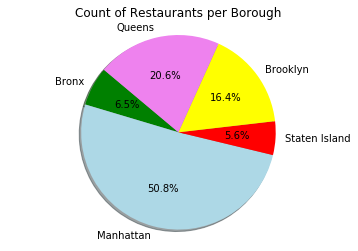

<Figure size 432x288 with 0 Axes>

In [17]:
# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

labels = "Bronx","Manhattan","Staten Island","Brooklyn","Queens"
sizes = [1299, 10170, 1119, 3282, 4130]
colors = ["green","lightblue","red","yellow","violet"]
explode = (0, 0, 0, 0,0) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Count of Restaurants per Borough")
plt.axis('equal')
plt.show()

plt.savefig('Outputs/Count_restaurants.png')

In [18]:
# Graph 3: heatmap of restaurant density by zipcode
## delete restaurants that don't have an assigned zipcode

# Drop Duplicate restaurant data
restaurantDensity = results_df.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])

#Get Restaurant Weight per zip code
restaurantDensity = restaurantDensity.groupby("zipcode").agg({'zipcode':'count'})
restaurantDensity = restaurantDensity.rename(columns = {"zipcode" : "RestaurantCount"})
restaurantDensity['RestaurantWeight']=restaurantDensity['RestaurantCount']/sum(restaurantDensity['RestaurantCount'])*100
restaurantDensity['RestaurantWeight']=restaurantDensity['RestaurantWeight'].map("{:.2f}".format)
restaurantDensity = restaurantDensity.reset_index(level=['zipcode'])
print(sum(restaurantDensity['RestaurantCount']))
restaurantDensity.head(5)

1126


,zipcode,RestaurantCount,RestaurantWeight
0,10001,15,1.33
1,10002,5,0.44
2,10003,39,3.46
3,10004,5,0.44
4,10005,4,0.36


In [19]:
zip_codesData = GeoDataFrame.from_file('ZIP_CODE_040114/ZIP_CODE_040114.shp') #read in shape file
zip_codesData['ZIPCODE'] = zip_codesData['ZIPCODE'].astype(int) #converting zipcode column to integer data type
zip_codesData = zip_codesData.rename(columns = {"ZIPCODE" : "zip_code"})

restaurantDensityUpdated = GeoDataFrame(restaurantDensity)
restaurantDensityUpdated = restaurantDensityUpdated.rename(columns = {"zipcode" : "zip_code"})

#print(type(zip_codesData))
#print(type(restaurantDensityUpdated))

restaurantDensityUpdated['zip_code'] = restaurantDensityUpdated['zip_code'].astype(int)

restaurantDensityUpdated.head()

,zip_code,RestaurantCount,RestaurantWeight
0,10001,15,1.33
1,10002,5,0.44
2,10003,39,3.46
3,10004,5,0.44
4,10005,4,0.36


In [20]:
# Merge restaurant Density DF with GeoDataFrame zipcode file
restaurantDensityUpdated = GeoDataFrame(restaurantDensityUpdated.merge(zip_codesData, how='right', 
                                                                       left_on='zip_code', right_on='zip_code'))
restaurantDensityUpdated= restaurantDensityUpdated.dropna() #drop null values
restaurantDensityUpdated.head(2)

,zip_code,RestaurantCount,RestaurantWeight,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,15.0,1.33,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,5.0,0.44,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."


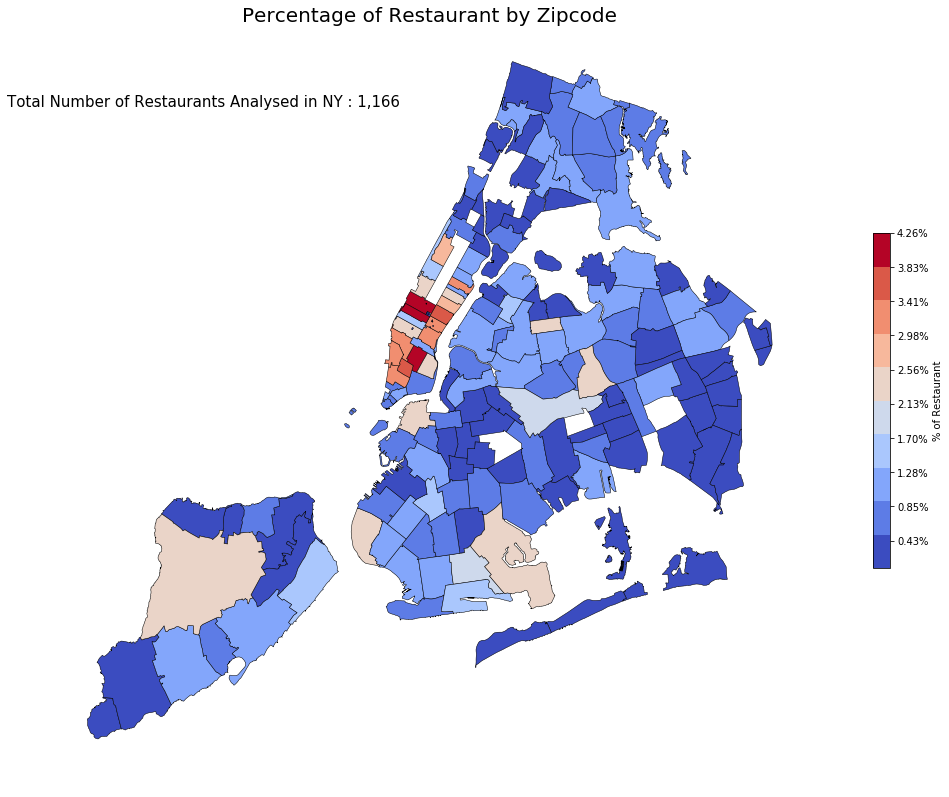

In [46]:
numOfcolorGradation = 10
chartSize = 15
colorScheme = 'coolwarm'
edgeColorValue = 'black'
boundaryLineWidth = 0.5

cmap = plt.cm.get_cmap(colorScheme, numOfcolorGradation)

fig, ax = plt.subplots(figsize = (chartSize,chartSize))

zz_Chart = restaurantDensityUpdated.plot(column='RestaurantWeight', 
                                 cmap=cmap,
                                 alpha=1,
                                 linewidth=boundaryLineWidth, 
                                 ax=ax,
                                 edgecolor=edgeColorValue)

vmin = restaurantDensityUpdated.RestaurantWeight.min()
vmax = restaurantDensityUpdated.RestaurantWeight.max()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure


ticksVal=np.linspace(start=0, stop=float(max(restaurantDensityUpdated['RestaurantWeight'].values)), 
                     num=numOfcolorGradation+1)

cbar = fig.colorbar(sm,
                    cmap=cmap, 
                    ax=ax,
                    fraction=0.02,
                    pad=0.08,
                    label='% of Restaurant',
                    ticks=ticksVal,
                    format=StrMethodFormatter('{x:,.2f}%'))


plt.title('Percentage of Restaurant by Zipcode', size=20)
plt.axis('off')

plt.text(0.2, 0.9,
         s='Total Number of Restaurants Analysed in NY : ' + 
         str(format(int(sum(restaurantDensityUpdated['RestaurantCount'].values)),',d')), 
         ha='center', va='center', transform=ax.transAxes, size=15)

plt.savefig('Percentage_Restaurants_by_Zipcode.png')
plt.show()

In [22]:
# Graph 4: scatter plot, Y= grades, x = cuisines
## Bin grades into integers (6=A, 5=B, 4=C, etc), and average them per cuisine. Label points.


In [23]:
# Graph 4b: scatter plot, Y= closures, x = cuisines
# count of closures by cuisine. Label points.

In [33]:
# Graph 5: heatmap of inspections per zipcode
# delete entries without inspections or zipcodes
#Filtering DataFrame for Close and Reclosure Restaurant
ClosuresDF = results_df[results_df['action'].str.contains('losed by DOHMH')]
ClosuresDF = ClosuresDF.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
TotalClosures = len(ClosuresDF)

ClosuresDF = ClosuresDF.groupby("zipcode").agg({'zipcode':'count'})
ClosuresDF = ClosuresDF.rename(columns = {"zipcode" : "ClosuresDFCount"})
ClosuresDF['ClosuresDFWeight']=ClosuresDF['ClosuresDFCount']/TotalClosures*100
ClosuresDF['ClosuresDFWeight']=ClosuresDF['ClosuresDFWeight'].map("{:.2f}".format)
ClosuresDF = ClosuresDF.reset_index(level=['zipcode'])
ClosuresDF.head(5)

,zipcode,ClosuresDFCount,ClosuresDFWeight
0,10001,1,1.03
1,10003,5,5.15
2,10005,2,2.06
3,10009,1,1.03
4,10011,5,5.15


In [34]:
#Converting DF to GeoDataFrame
ClosuresDFUpdated=GeoDataFrame(ClosuresDF)
ClosuresDFUpdated = ClosuresDFUpdated.rename(columns = {"zipcode" : "zip_code"})

#print(type(zip_codesData))
#print(type(restaurantDensityUpdated))

# Merge Closure Restaurants DF with GeoDataFrame zipcode file
ClosuresDFUpdated['zip_code'] = ClosuresDFUpdated['zip_code'].astype(int)
ClosuresDFUpdated = GeoDataFrame(ClosuresDFUpdated.merge(zip_codesData, how='right', 
                                                                       left_on='zip_code', right_on='zip_code'))
ClosuresDFUpdated= ClosuresDFUpdated.dropna() #drop null values
ClosuresDFUpdated.head(2)

,zip_code,ClosuresDFCount,ClosuresDFWeight,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,1.0,1.03,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10003,5.0,5.15,0,New York,55878.0,1.553838e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((989830.469142139 207048.1263078749, ..."


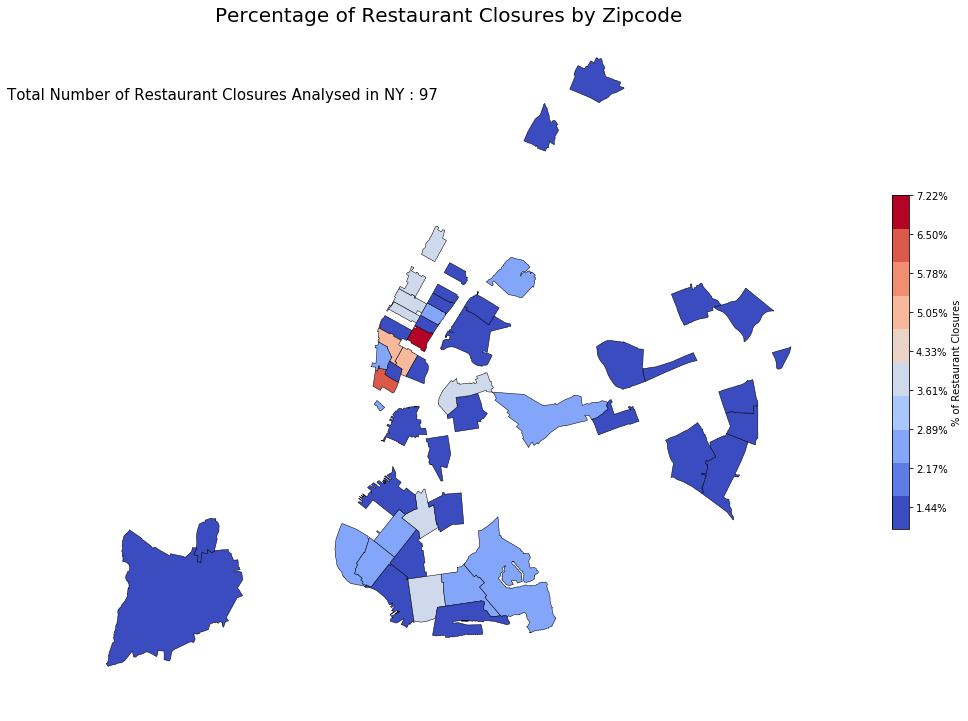

In [47]:
numOfcolorGradation = 10
chartSize = 15
colorScheme = 'coolwarm'
edgeColorValue = 'black'
boundaryLineWidth = 0.5

cmap = plt.cm.get_cmap(colorScheme, numOfcolorGradation)

fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_Chart2 = ClosuresDFUpdated.plot(column='ClosuresDFWeight', 
                                 cmap=cmap,
                                 alpha=1,
                                 linewidth=boundaryLineWidth, 
                                 ax=ax,
                                 edgecolor=edgeColorValue)

vmin2 = ClosuresDFUpdated.ClosuresDFWeight.min()
vmax2 = ClosuresDFUpdated.ClosuresDFWeight.max()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin2, vmax=vmax2))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

ticksVal=np.linspace(start=0, stop=float(max(ClosuresDFUpdated['ClosuresDFWeight'].values)), 
                     num=numOfcolorGradation+1)

cbar = fig.colorbar(sm,
                    cmap=cmap, 
                    ax=ax,
                    fraction=0.02,
                    pad=0.08,
                    label='% of Restaurant Closures',
                    ticks=ticksVal,
                    format=StrMethodFormatter('{x:,.2f}%'))


plt.title('Percentage of Restaurant Closures by Zipcode', size=20)
plt.axis('off')

plt.text(0.2, 0.9,
         s='Total Number of Restaurant Closures Analysed in NY : ' + 
         str(format(int(TotalClosures),',d')), 
         ha='center', va='center', transform=ax.transAxes, size=15)

plt.savefig('Percentage_Restaurant_Closures_by_Zipcode.png')
plt.show()


In [25]:
# Graph 6: Bargraph of closures and reclosures by borough
# count closures, count reclosures, group by borough

In [26]:
# Graph 6b: heatmap of re/closures by zipcode
# restates graph 6

In [37]:
# Graph 7: heatmap of critical violations by zipcode or scatterplot by cuisine
# describes which areas or cuisines are the most dangerous, as critical violations led foodborne illness
#Get CriticalViolations Weight per zip code

CriticalViolations = results_df[results_df.critical_flag=='Critical']
TotalCriticalViolations = len(CriticalViolations)

CriticalViolationsDensity = CriticalViolations.groupby("zipcode").agg({'zipcode':'count'})
CriticalViolationsDensity = CriticalViolationsDensity.rename(columns = {"zipcode" : "CriticalViolationCount"})
CriticalViolationsDensity['CriticalViolationWeight']=CriticalViolationsDensity['CriticalViolationCount']/TotalCriticalViolations*100
CriticalViolationsDensity['CriticalViolationWeight']=CriticalViolationsDensity['CriticalViolationWeight'].map("{:.2f}".format)
CriticalViolationsDensity = CriticalViolationsDensity.reset_index(level=['zipcode'])
CriticalViolationsDensity.head(5)

,zipcode,CriticalViolationCount,CriticalViolationWeight
0,10001,146,1.35
1,10002,27,0.25
2,10003,435,4.04
3,10004,21,0.19
4,10005,69,0.64


In [38]:
#Converting DF to GeoDataFrame

CriticalViolationsDensityUpdated=GeoDataFrame(CriticalViolationsDensity)
CriticalViolationsDensityUpdated = CriticalViolationsDensityUpdated.rename(columns = {"zipcode" : "zip_code"})

#print(type(zip_codesData))
#print(type(restaurantDensityUpdated))

#Merging GeoDataFrame with Critical Violations Density DF


CriticalViolationsDensityUpdated['zip_code'] = CriticalViolationsDensityUpdated['zip_code'].astype(int)
CriticalViolationsDensityUpdated = GeoDataFrame(CriticalViolationsDensityUpdated.merge(zip_codesData, how='right', 
                                                                       left_on='zip_code', right_on='zip_code'))
CriticalViolationsDensityUpdated= CriticalViolationsDensityUpdated.dropna() #drop null values
CriticalViolationsDensityUpdated.head(2)

,zip_code,CriticalViolationCount,CriticalViolationWeight,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,146.0,1.35,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,27.0,0.25,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."


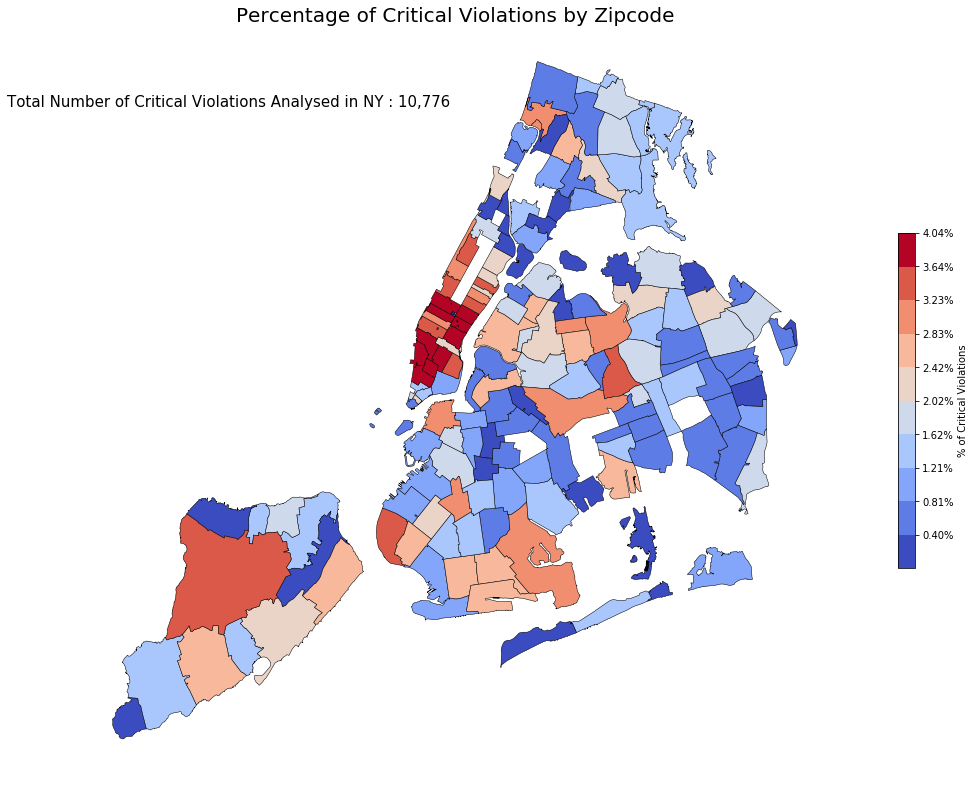

In [50]:
#ColorSchems: OrRd,seismic,viridis,RdYlBu,coolwarm,hot,YlGn

numOfcolorGradation = 10
chartSize = 15
colorScheme = 'coolwarm'
edgeColorValue = 'black'
boundaryLineWidth = 0.5

cmap = plt.cm.get_cmap(colorScheme, numOfcolorGradation)

fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_Chart2 = CriticalViolationsDensityUpdated.plot(column='CriticalViolationWeight', 
                                 cmap=cmap,
                                 alpha=1,
                                 linewidth=boundaryLineWidth, 
                                 ax=ax,
                                 edgecolor=edgeColorValue)

vmin3 = CriticalViolationsDensityUpdated.CriticalViolationWeight.min()
vmax3 = CriticalViolationsDensityUpdated.CriticalViolationWeight.max()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin3, vmax=vmax3))
# empty array for the data range
sm._A = []
# add the colorbar to the figure

ticksVal=np.linspace(start=0, stop=float(max(CriticalViolationsDensityUpdated['CriticalViolationWeight'].values)), 
                     num=numOfcolorGradation+1)

cbar = fig.colorbar(sm,
                    cmap=cmap, 
                    ax=ax,
                    fraction=0.02,
                    pad=0.08,
                    label='% of Critical Violations',
                    ticks=ticksVal,
                    format=StrMethodFormatter('{x:,.2f}%'))

plt.title('Percentage of Critical Violations by Zipcode', size=20)
plt.axis('off')

plt.text(0.2, 0.9,
         s='Total Number of Critical Violations Analysed in NY : ' + 
         str(format(int(TotalCriticalViolations),',d')), 
         ha='center', va='center', transform=ax.transAxes, size=15)

plt.savefig('Percentage_Critical_Violations_by_Zipcode.png')
plt.show()


In [48]:
#Merging Restaurant Density DF and CriticalViolationsDensity DF

CriticalViolationsDensity

CViolperRest = pd.merge(restaurantDensity[['zipcode','RestaurantCount']],
                        CriticalViolationsDensity[['zipcode','CriticalViolationCount']], 
                        how='left',left_on=['zipcode'],right_on=['zipcode'])
CViolperRest['CVperRest']=CViolperRest['CriticalViolationCount']/CViolperRest['RestaurantCount']
# Fill 0's for null rows
CViolperRest.fillna(0, inplace=True)
CViolperRest.head(5)
#CViolperRest.to_csv('CViolperRest.csv',index=True,header=True)

,zipcode,RestaurantCount,CriticalViolationCount,CVperRest
0,10001,15,146.0,9.733333
1,10002,5,27.0,5.400000
2,10003,39,435.0,11.153846
3,10004,5,21.0,4.200000
4,10005,4,69.0,17.250000


In [49]:
#Converting DF to GeoDataFrame

CViolperRestUpdated=GeoDataFrame(CViolperRest)
CViolperRestUpdated = CViolperRestUpdated.rename(columns = {"zipcode" : "zip_code"})

#print(type(zip_codesData))
#print(type(restaurantDensityUpdated))

#Merging GeoDataFrame with Critical Violations Per Restaurant

CViolperRestUpdated['zip_code'] = CViolperRestUpdated['zip_code'].astype(int)
CViolperRestUpdated = GeoDataFrame(CViolperRestUpdated.merge(zip_codesData, how='right', 
                                                                       left_on='zip_code', right_on='zip_code'))
CViolperRestUpdated= CViolperRestUpdated.dropna() #drop null values
CViolperRestUpdated.head(2)

,zip_code,RestaurantCount,CriticalViolationCount,CVperRest,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,10001,15.0,146.0,9.733333,0,New York,22413.0,1.779494e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((981958.6472873986 213464.4530421346,..."
1,10002,5.0,27.0,5.400000,0,New York,81305.0,2.628013e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((991339.8703228086 207576.7837151289,..."


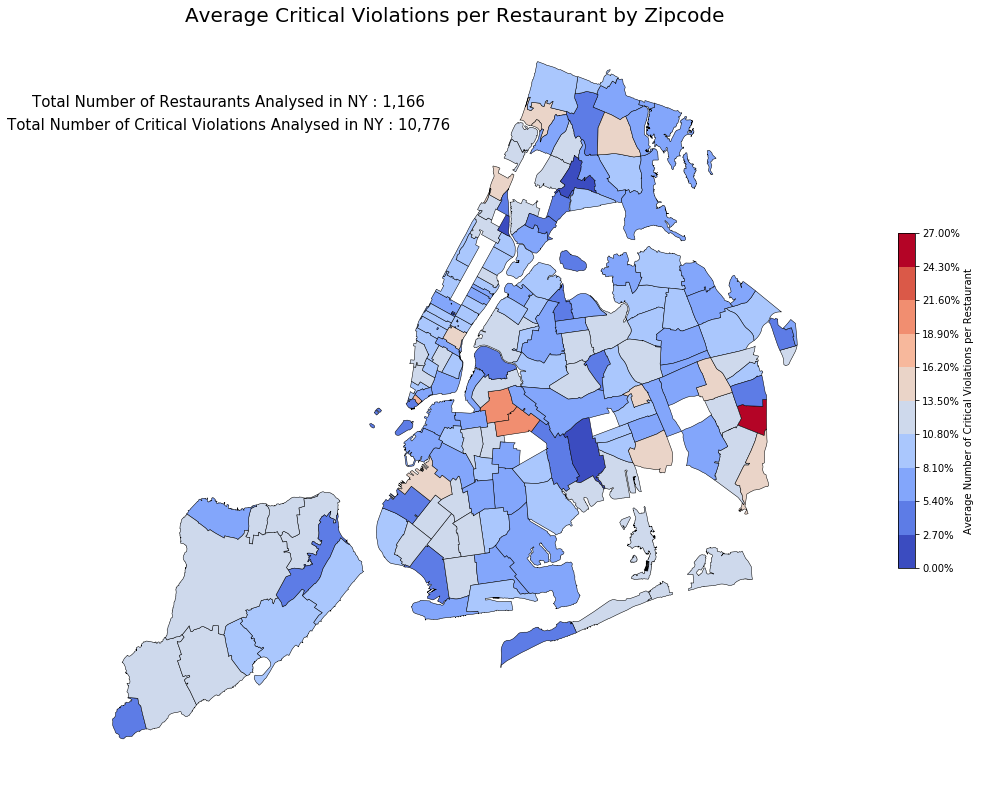

In [51]:
#ColorSchems: OrRd,seismic,viridis,RdYlBu,coolwarm,hot,YlGn

numOfcolorGradation = 10
chartSize = 15
colorScheme = 'coolwarm'
edgeColorValue = 'black'
boundaryLineWidth = 0.5

cmap = plt.cm.get_cmap(colorScheme, numOfcolorGradation)

fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_Chart2 = CViolperRestUpdated.plot(column='CVperRest', 
                                 cmap=cmap,
                                 alpha=1,
                                 linewidth=boundaryLineWidth, 
                                 ax=ax,
                                 edgecolor=edgeColorValue)


vmin4 = CViolperRestUpdated.CVperRest.min()
vmax4 = CViolperRestUpdated.CVperRest.max()

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin4, vmax=vmax4))
# empty array for the data range
sm._A = []
# add the colorbar to the figure


ticksVal=np.linspace(start=0, stop=float(max(CViolperRestUpdated['CVperRest'].values)), 
                     num=numOfcolorGradation+1)

cbar = fig.colorbar(sm,
                    cmap=cmap, 
                    ax=ax,
                    fraction=0.02,
                    pad=0.08,
                    label='Average Number of Critical Violations per Restaurant',
                    ticks=ticksVal,
                    format=StrMethodFormatter('{x:,.2f}%'))

plt.title('Average Critical Violations per Restaurant by Zipcode', size=20)
plt.axis('off')

plt.text(0.2, 0.9,
         s='Total Number of Restaurants Analysed in NY : ' + 
         str(format(int(sum(restaurantDensityUpdated['RestaurantCount'].values)),',d')), 
         ha='center', va='center', transform=ax.transAxes, size=15)
plt.text(0.2, 0.87,
         s='Total Number of Critical Violations Analysed in NY : ' + 
         str(format(int(TotalCriticalViolations),',d')), 
         ha='center', va='center', transform=ax.transAxes, size=15)

plt.savefig('Critical_Violations_per_Restaurant_by_Zipcode.png')
plt.show()


In [52]:
# Graph 8: heatmap of grades by zipcode or scatterplot by cuisine
# describes best and worst zipcodes, shows good/bad restaurants by cuisine
# get the number of restaurant per boro
restaurantBoro = results_df.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
restaurantBoro = restaurantBoro.groupby("boro").agg({'boro':'count'})
restaurantBoro = restaurantBoro.rename(columns = {"boro" : "RestaurantCount"})
restaurantBoro = restaurantBoro.reset_index(level=['boro'])
restaurantBoro = restaurantBoro[~restaurantBoro['boro'].str.contains('Missing')]
restaurantBoro.head()

,boro,RestaurantCount
0,BRONX,86
1,BROOKLYN,193
2,MANHATTAN,569
3,QUEENS,241
4,STATEN ISLAND,64


In [55]:
# Closures by Boro
ClosuresBoro = results_df[results_df['action'].str.contains('losed by DOHMH')]
ClosuresBoro = ClosuresBoro.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
ClosuresBoro = ClosuresBoro.groupby("boro").agg({'boro':'count'})
ClosuresBoro = ClosuresBoro.rename(columns = {"boro" : "ClosuresBoroCount"})
ClosuresBoro = ClosuresBoro.reset_index(level=['boro'])
ClosuresBoro.head()

,boro,ClosuresBoroCount
0,BRONX,2
1,BROOKLYN,28
2,MANHATTAN,48
3,QUEENS,17
4,STATEN ISLAND,2


In [56]:
# merge the data
restaurantClosureBoro = pd.merge(restaurantBoro,ClosuresBoro, 
                                  how='left',left_on=['boro'],right_on=['boro'])
restaurantClosureBoro['PercentClosedperBoro']=restaurantClosureBoro['ClosuresBoroCount']/restaurantClosureBoro['RestaurantCount']*100
# restaurantClosureBoro['PercentClosedperBoro']=restaurantClosureBoro['PercentClosedperBoro'].map("{:.2f}".format)
#print(restaurantClosureBoro)
restaurantClosureBoro.head()

,boro,RestaurantCount,ClosuresBoroCount,PercentClosedperBoro
0,BRONX,86,2,2.325581
1,BROOKLYN,193,28,14.507772
2,MANHATTAN,569,48,8.435852
3,QUEENS,241,17,7.053942
4,STATEN ISLAND,64,2,3.125000


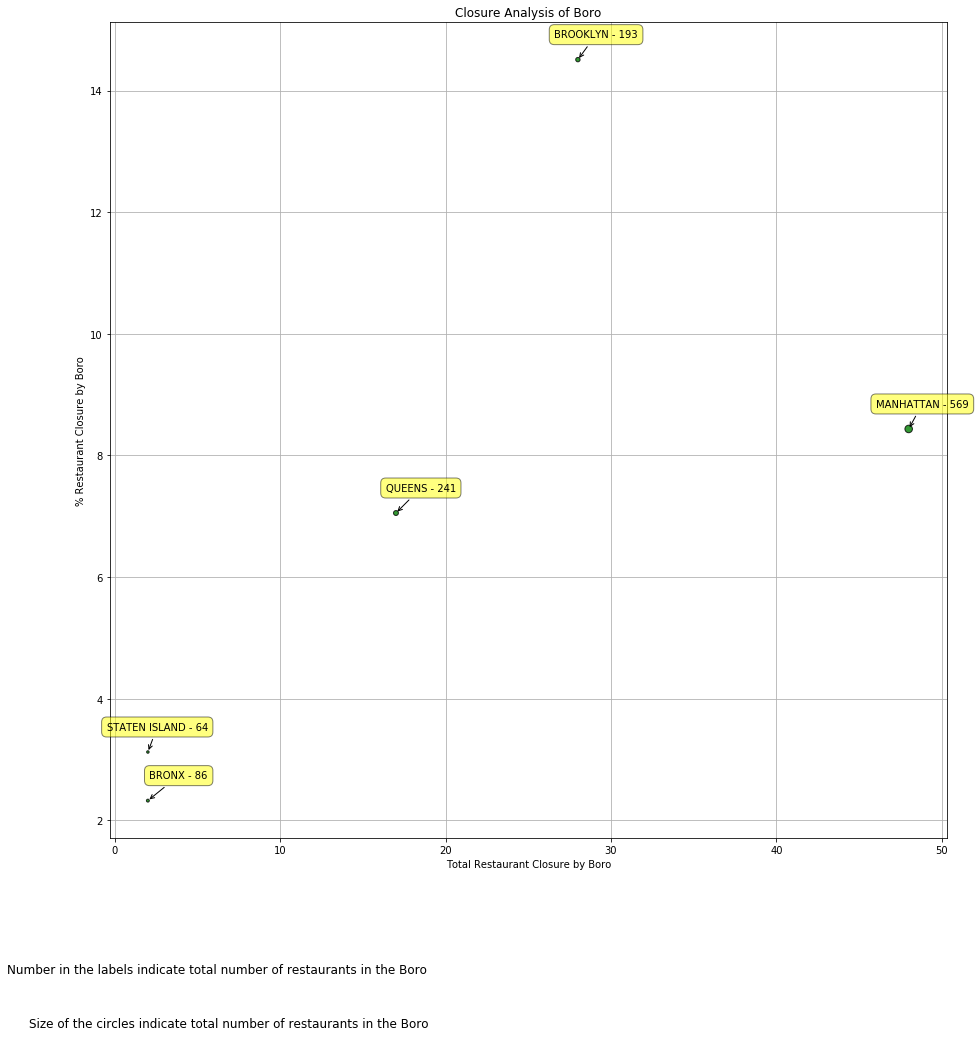

In [62]:
xVal = restaurantClosureBoro['ClosuresBoroCount'].values
yVal = restaurantClosureBoro['PercentClosedperBoro'].values
sVal = restaurantClosureBoro['RestaurantCount'].values/10
labels = [m + ' - ' + str(format(int(n),',d')) for m,n in zip(restaurantClosureBoro['boro'],restaurantClosureBoro['RestaurantCount'])]

#print(labels)
# create the scatter plot
chartSize = 15
fig, ax = plt.subplots(figsize = (chartSize,chartSize))
zz_chart8 = plt.scatter(xVal, yVal,s = sVal,
                        marker='o',alpha =0.8,
                    color='Green',edgecolors = 'black')

plt.ylabel("% Restaurant Closure by Boro")
plt.xlabel("Total Restaurant Closure by Boro")
plt.title("Closure Analysis of Boro")
plt.grid()

for label, x, y in zip(labels, xVal, yVal):
    plt.annotate(
        label,
        xy=(x, y), xytext=(60, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round, pad = 0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.text(0.03, 0.0, 'Number in the labels indicate total number of restaurants in the Boro', 
         fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.05, -0.05, 'Size of the circles indicate total number of restaurants in the Boro', 
         fontsize=12, transform=plt.gcf().transFigure)
plt.savefig('Closure_Analysis_of_Boro.png')
plt.show()

In [63]:
#Closures by Cuisine
ClosuresCusine = results_df[results_df['action'].str.contains('losed by DOHMH')]
ClosuresCusine = ClosuresCusine.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
ClosuresCusine = ClosuresCusine.groupby("cuisine_description").agg({'cuisine_description':'count'})
ClosuresCusine = ClosuresCusine.rename(columns = {"cuisine_description" : "ClosuresCusineCount"})
ClosuresCusine = ClosuresCusine.reset_index(level=['cuisine_description'])
ClosuresCusine.head()

,cuisine_description,ClosuresCusineCount
0,American,18
1,Bagels/Pretzels,2
2,Bakery,11
3,"Bottled beverages, including water, sodas, jui...",1
4,CafÃ©/Coffee/Tea,5


In [64]:
# Restaurant count by Cusine
restaurantCusine = results_df.drop_duplicates(subset=['zipcode','boro','dba','cuisine_description','phone','street'])
restaurantCusine = restaurantCusine.groupby("cuisine_description").agg({'cuisine_description':'count'})
restaurantCusine = restaurantCusine.rename(columns = {"cuisine_description" : "RestaurantCount"})
restaurantCusine = restaurantCusine.reset_index(level=['cuisine_description'])
restaurantCusine = restaurantCusine[~restaurantCusine['cuisine_description'].str.contains('Missing')]
restaurantCusine = restaurantCusine.sort_values(by='RestaurantCount',ascending=False)
restaurantCusine = restaurantCusine[:20]
restaurantCusine

,cuisine_description,RestaurantCount
0,American,416
31,Italian,123
43,Pizza,67
24,Hamburgers,55
4,Bakery,45
44,Pizza/Italian,42
30,Irish,37
36,"Latin (Cuban, Dominican, Puerto Rican, South &...",31
7,CafÃ©/Coffee/Tea,28
21,French,25


In [65]:
# merge the data
restaurantClosureCusine = pd.merge(restaurantCusine,ClosuresCusine, 
                                  how='left',left_on=['cuisine_description'],right_on=['cuisine_description'])

restaurantClosureCusine['PercentClosedperCusine']=restaurantClosureCusine['ClosuresCusineCount']/restaurantClosureCusine['RestaurantCount']*100
# restaurantClosureBoro['PercentClosedperBoro']=restaurantClosureBoro['PercentClosedperBoro'].map("{:.2f}".format)

restaurantClosureCusine = restaurantClosureCusine.sort_values(by='PercentClosedperCusine',ascending=False)
restaurantClosureCusine['cuisine_description'] = restaurantClosureCusine['cuisine_description'].replace('Latin (Cuban, Dominican, Puerto Rican, South & Central American)', 'Latin')

#print(restaurantClosureBoro)
restaurantClosureCusine

,cuisine_description,RestaurantCount,ClosuresCusineCount,PercentClosedperCusine
10,Jewish/Kosher,24,6.0,25.000000
4,Bakery,45,11.0,24.444444
8,CafÃ©/Coffee/Tea,28,5.0,17.857143
5,Pizza/Italian,42,7.0,16.666667
14,Mexican,18,3.0,16.666667
18,Spanish,13,2.0,15.384615
16,Bagels/Pretzels,14,2.0,14.285714
11,Japanese,21,3.0,14.285714
15,Delicatessen,16,2.0,12.500000
13,Caribbean,18,2.0,11.111111


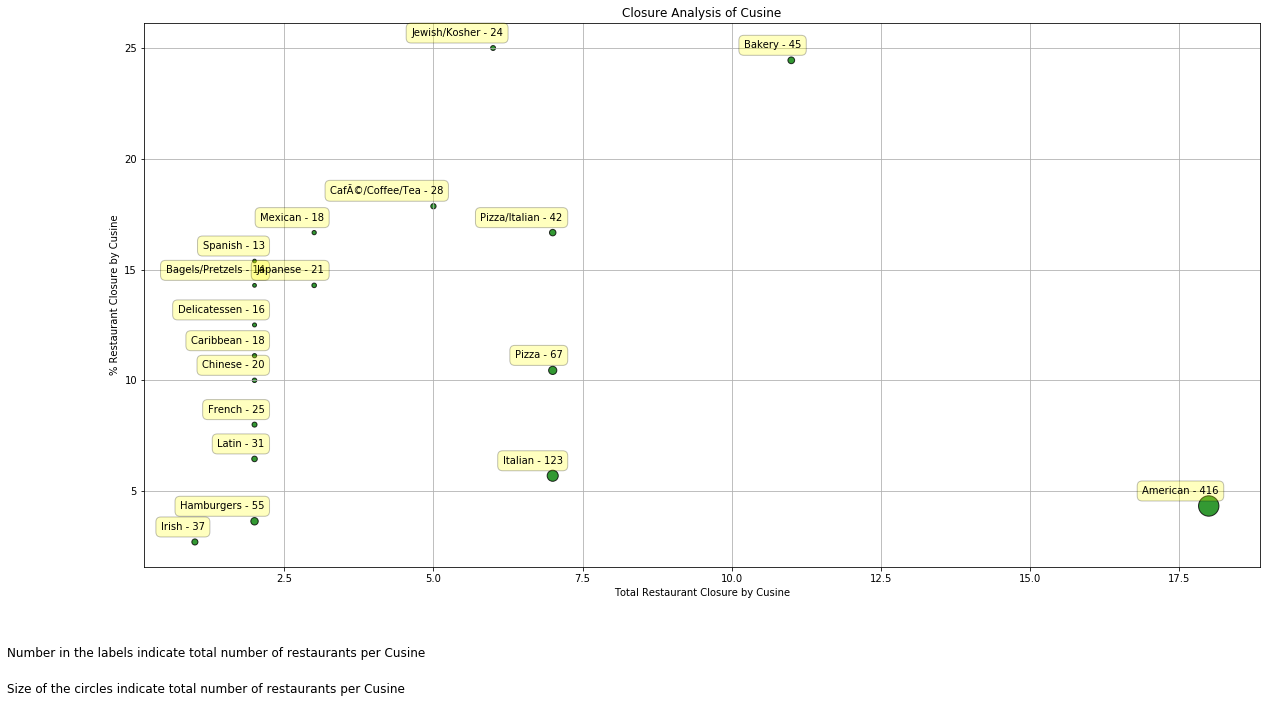

In [81]:
xVal2 = restaurantClosureCusine['ClosuresCusineCount'].values
yVal2 = restaurantClosureCusine['PercentClosedperCusine'].values
sVal2 = restaurantClosureCusine['RestaurantCount'].values
labels2 = [m + ' - ' + str(format(int(n),',d')) for m,n in zip(restaurantClosureCusine['cuisine_description'],restaurantClosureCusine['RestaurantCount'])]

#print(labels)
# create the scatter plot
chartSizeL = 20
chartSizeB = 10
fig, ax = plt.subplots(figsize = (chartSizeL,chartSizeB))
zz_chart8 = plt.scatter(xVal2, yVal2,s = sVal2,
                        marker='o',alpha =0.8,
                    color='Green',edgecolors = 'black')


plt.ylabel("% Restaurant Closure by Cusine")
plt.xlabel("Total Restaurant Closure by Cusine")
plt.title("Closure Analysis of Cusine")
plt.grid()


for label, x, y in zip(labels2, xVal2, yVal2):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round, pad = 0.5', fc='yellow', alpha=0.25))


plt.text(0.03, 0.0, 'Number in the labels indicate total number of restaurants per Cusine', 
         fontsize=12, transform=plt.gcf().transFigure)
plt.text(0.03, -0.05, 'Size of the circles indicate total number of restaurants per Cusine', 
         fontsize=12, transform=plt.gcf().transFigure)
plt.savefig('Closure_Analysis_of_Cusine.png')
plt.show()


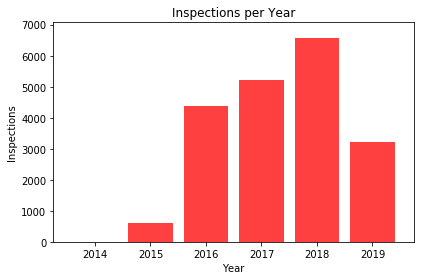

In [29]:
#Graph 9: bargraph showing inspections per year, closures per year

x_axis = np.arange(0, len(dyear))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Inspections per Year")
plt.xlabel("Year")
plt.ylabel("Inspections")

plt.xlim(-0.75, len(dyear)-.25)
plt.ylim(0, max(dyear) + 500)

plt.bar(x_axis, dyear, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, dyear.index)

plt.tight_layout()
plt.show()

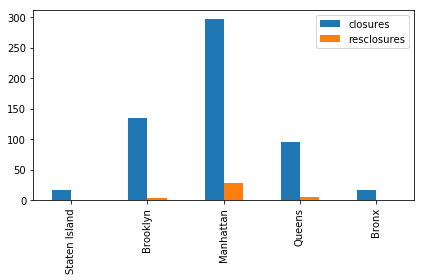

In [30]:
#Graph 9b: bargraph showing closures per year
# Converting the "duration (seconds)" column's values to numeric

closures9b = final_df.copy()
closures9b_df = closures9b.loc[closures9b['Action'] == 
                               "Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.", :]
closures9b_df2 = closures9b.loc[closures9b['Action'] == "Establishment re-closed by DOHMH", :]

# Count how many sightings have occured within each state
closures9b_counts = closures9b_df["Borough"].value_counts()
closures9b_counts2 = closures9b_df2["Borough"].value_counts()
closures9b1 = pd.concat([closures9b_counts,closures9b_counts2], axis=1, join='outer',sort=True)
closures9b2 = np.where(np.isnan(closures9b1), 0, closures9b1)
closures9b3 = pd.DataFrame(data=closures9b2, index=('Staten Island','Brooklyn','Manhattan','Queens','Bronx'), columns=('closures','resclosures'), dtype=None, copy=False)
closures9b3.plot.bar()
plt.tight_layout()
plt.show()

In [31]:
# Analysis??? Opportunities for Regressions, chi-squares?

In [32]:
# Get input from user about zipcode. Paste list of restaurants names from zipcode. 
# Get information from user about restaurant name. Print restaurant grade.